# Automatically Initialize and train any 1-D neural network

In [39]:
from neuralnetwork.datasets import nregion
from neuralnetwork import Network, build_scoop_network_1D

# Define Dataset

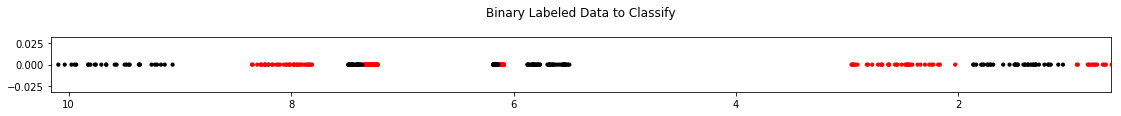

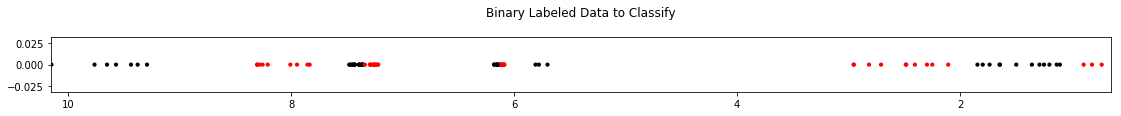

In [40]:
X_train, Y_train, X_val, Y_val, C, R = nregion.load_random_regions(regions=10, validation = 0.20, points=50)
nregion.graph(X_train, Y_train, size = 10, padding=10)
nregion.graph(X_val, Y_val, size = 10, padding=10)

Layer: L0, Neurons: 1, Activation: None, Weights: (0, 0), Biases: (0, 0)
Layer: L1, Neurons: 5, Activation: absolute, Weights: (5, 1), Biases: (5, 1)
Layer: L2, Neurons: 5, Activation: relu, Weights: (5, 5), Biases: (5, 1)
Layer: L3, Neurons: 1, Activation: sigmoid, Weights: (1, 5), Biases: (1, 1)


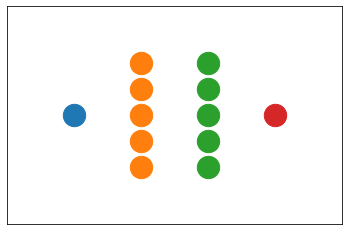

In [41]:
mynetwork = build_scoop_network_1D(C, R)

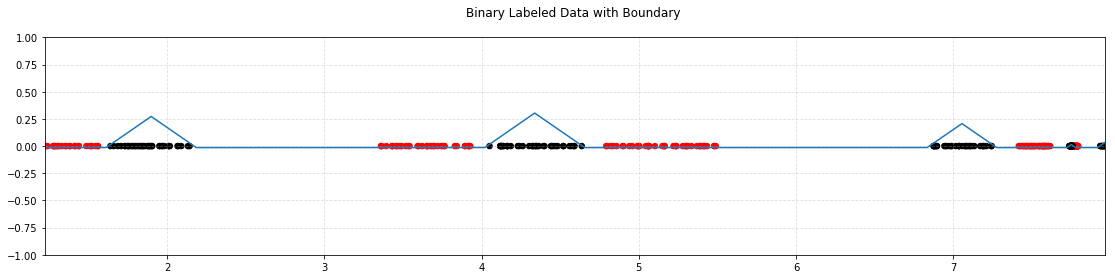

In [35]:
# Graph Decision Boundary|
nregion.graph(X_train, Y_train, decision = mynetwork.decision)

In [36]:
print(f"training_acc:{mynetwork.accuracy(X_train,Y_train)} val_acc:{mynetwork.accuracy(X_val,Y_val)}")
print(f"training_loss:{mynetwork.binary_crossentropy_loss(X_train,Y_train)} val_loss:{mynetwork.binary_crossentropy_loss(X_val,Y_val)}")

training_acc:1.0 val_acc:1.0
training_loss:0.666864293943211 val_loss:0.6629704084585148


# Train it for fun

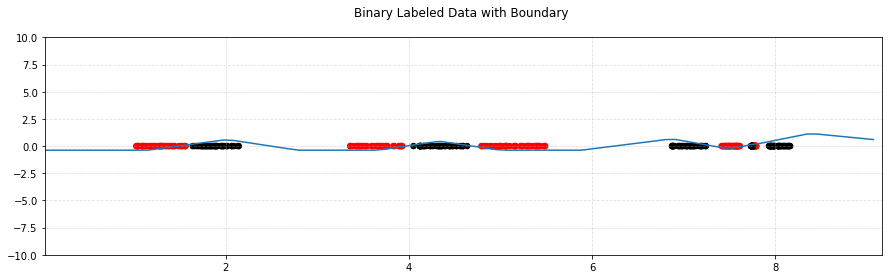

loss: 0.574 acc:  88% val_loss: 0.570 val_acc:  92%


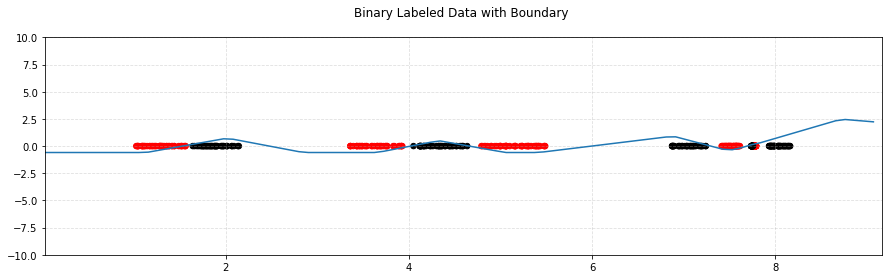

loss: 0.534 acc:  89% val_loss: 0.533 val_acc:  92%


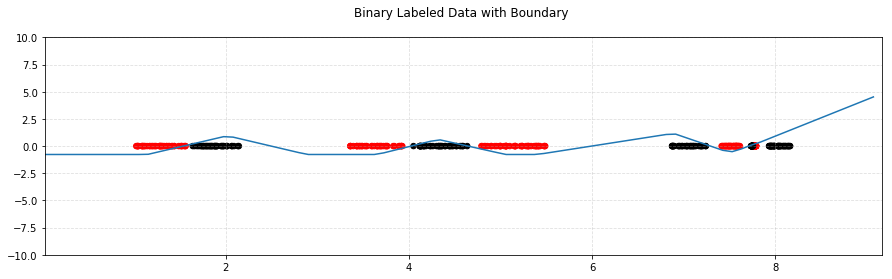

loss: 0.495 acc:  89% val_loss: 0.494 val_acc:  92%


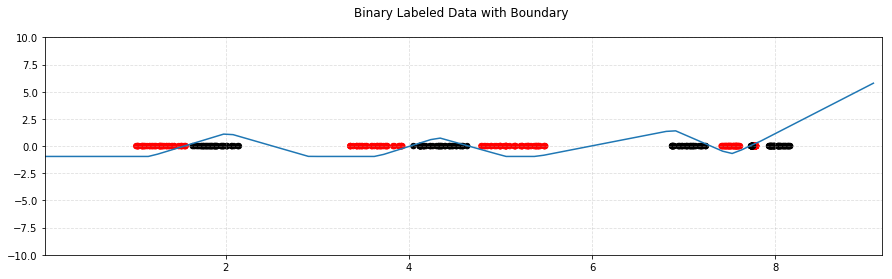

loss: 0.456 acc:  89% val_loss: 0.455 val_acc:  92%


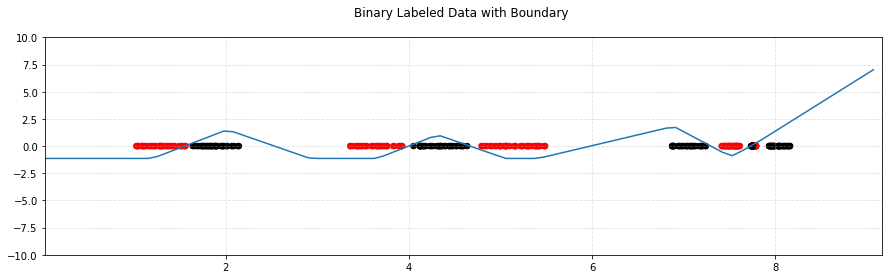

loss: 0.419 acc:  89% val_loss: 0.418 val_acc:  92%


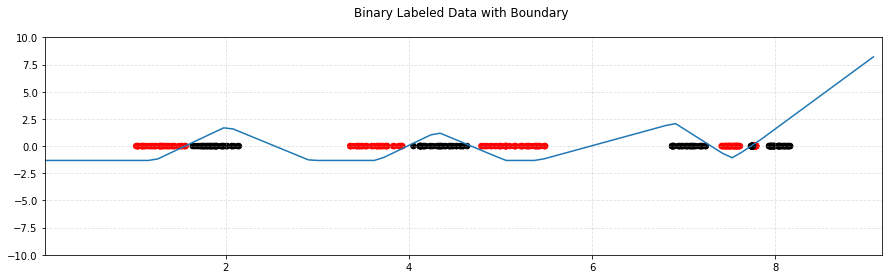

loss: 0.386 acc:  89% val_loss: 0.384 val_acc:  92%


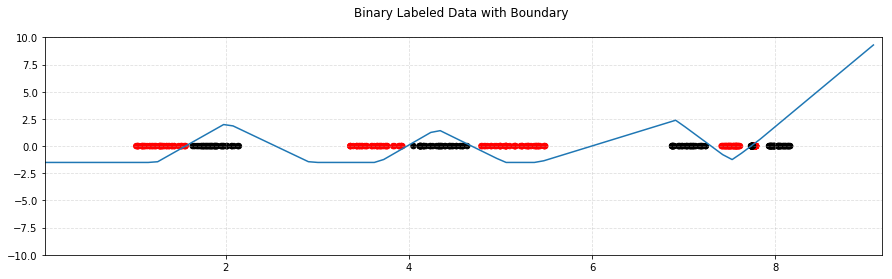

loss: 0.358 acc:  89% val_loss: 0.354 val_acc:  92%


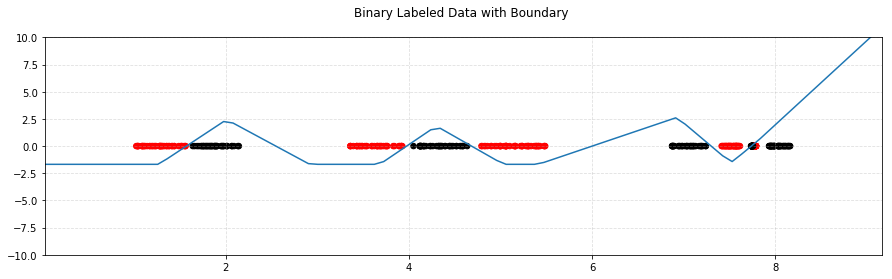

loss: 0.334 acc:  88% val_loss: 0.330 val_acc:  92%


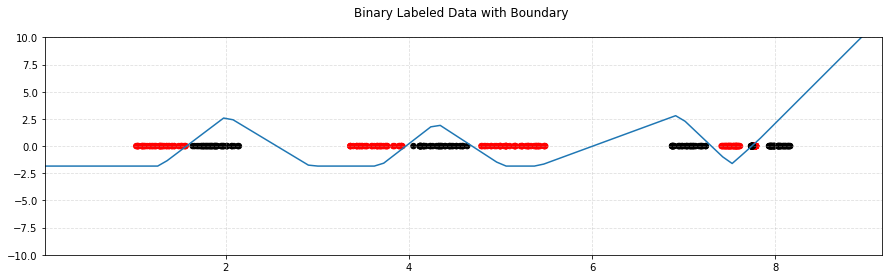

loss: 0.313 acc:  87% val_loss: 0.309 val_acc:  90%


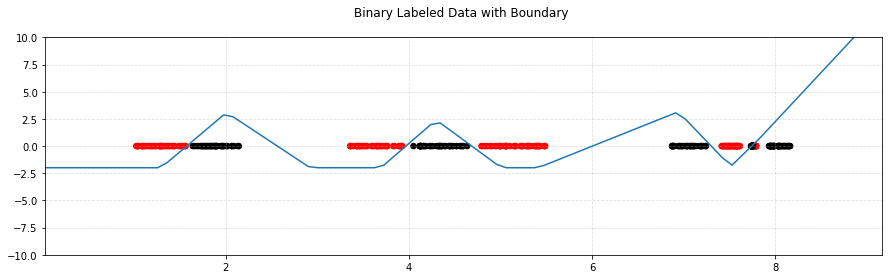

loss: 0.296 acc:  87% val_loss: 0.291 val_acc:  91%


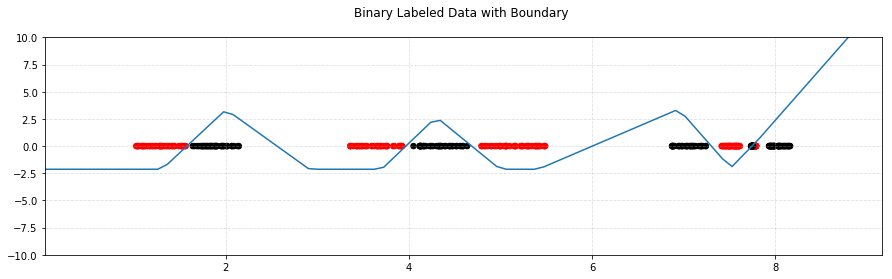

loss: 0.282 acc:  86% val_loss: 0.276 val_acc:  90%


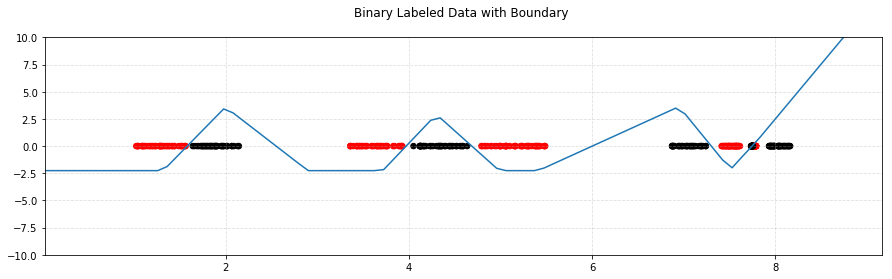

loss: 0.271 acc:  85% val_loss: 0.264 val_acc:  90%


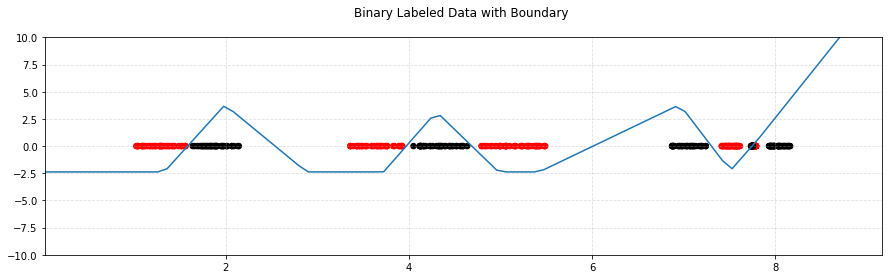

loss: 0.261 acc:  85% val_loss: 0.253 val_acc:  90%


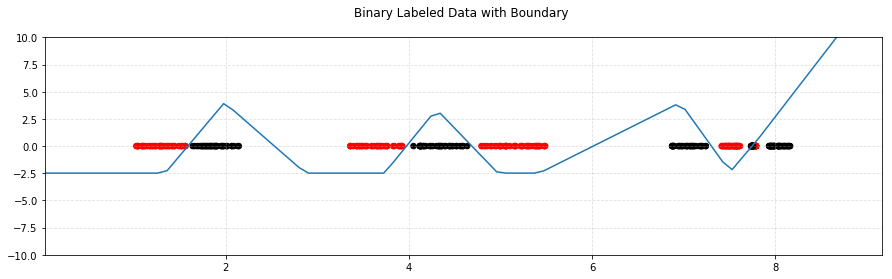

loss: 0.253 acc:  85% val_loss: 0.244 val_acc:  90%


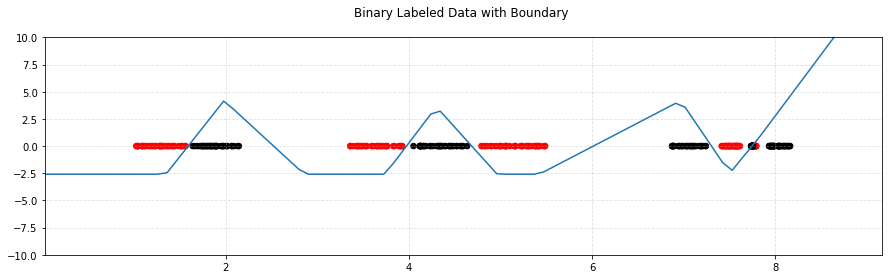

loss: 0.246 acc:  85% val_loss: 0.236 val_acc:  90%


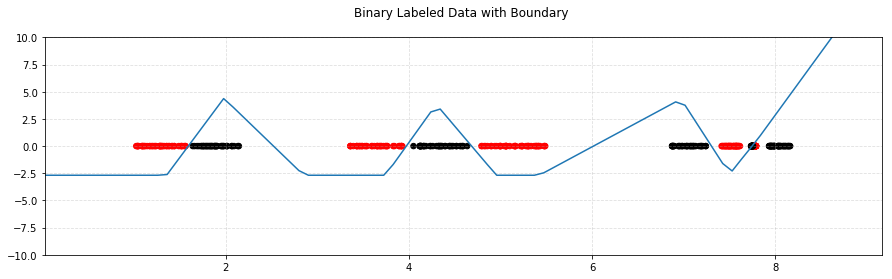

loss: 0.240 acc:  85% val_loss: 0.230 val_acc:  90%


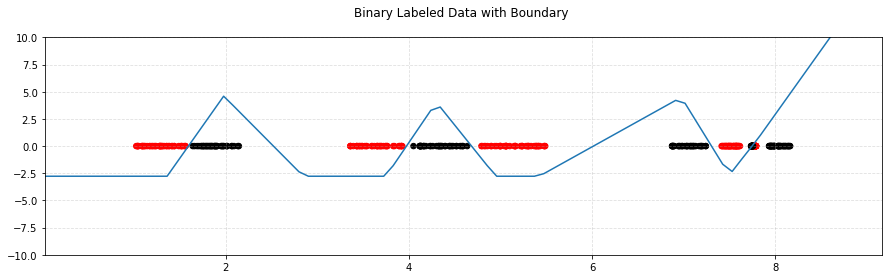

loss: 0.235 acc:  86% val_loss: 0.224 val_acc:  90%


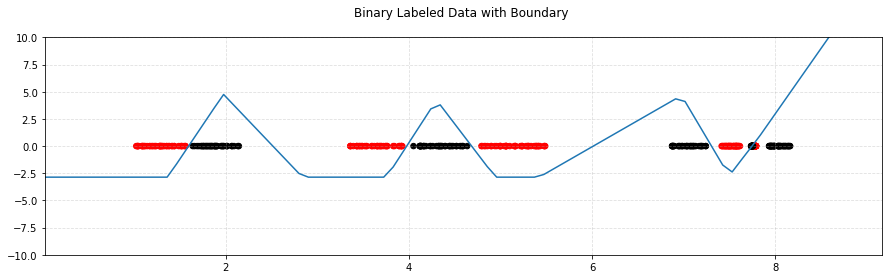

loss: 0.230 acc:  86% val_loss: 0.218 val_acc:  90%


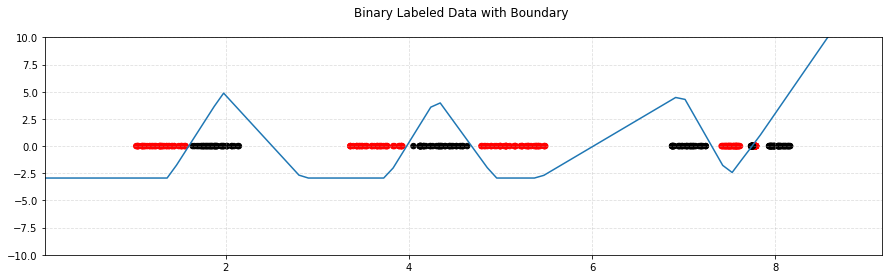

loss: 0.226 acc:  85% val_loss: 0.214 val_acc:  90%


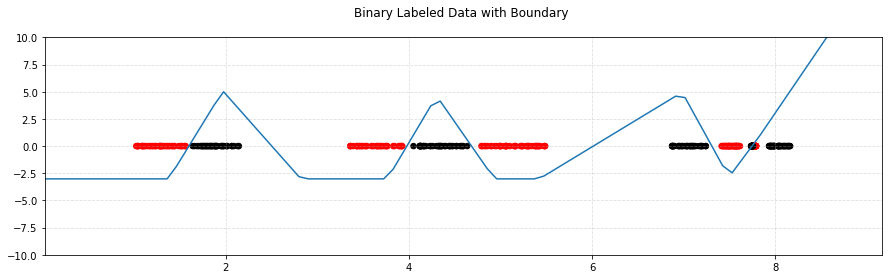

loss: 0.222 acc:  86% val_loss: 0.209 val_acc:  90%


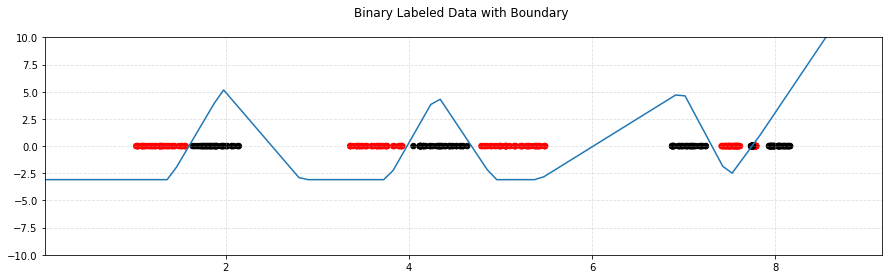

loss: 0.219 acc:  86% val_loss: 0.206 val_acc:  90%


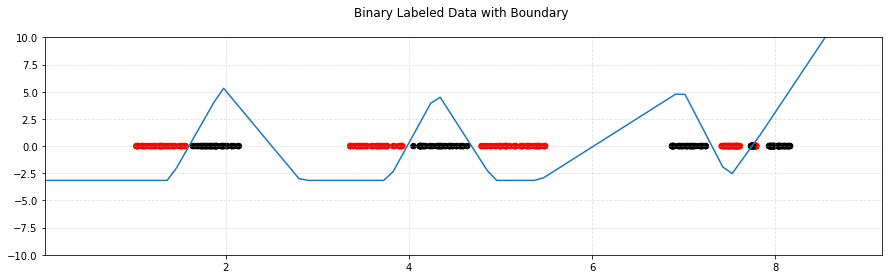

loss: 0.216 acc:  86% val_loss: 0.202 val_acc:  90%


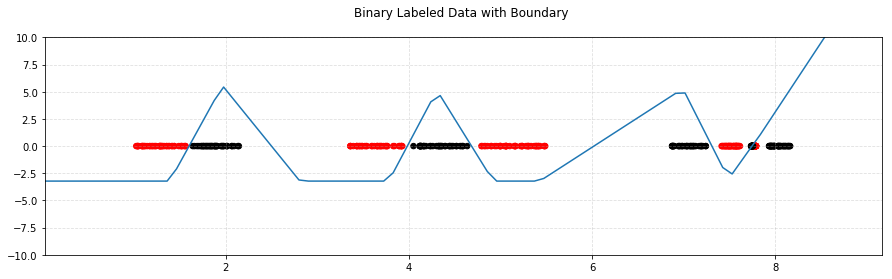

loss: 0.213 acc:  86% val_loss: 0.199 val_acc:  90%


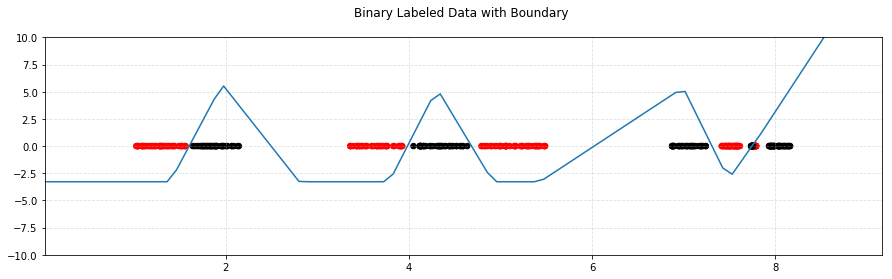

loss: 0.211 acc:  86% val_loss: 0.196 val_acc:  90%


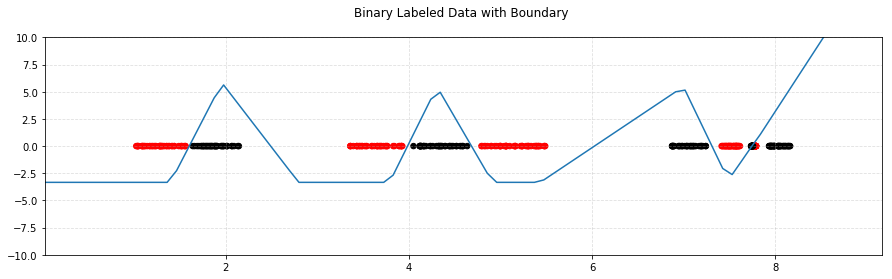

loss: 0.209 acc:  86% val_loss: 0.194 val_acc:  90%


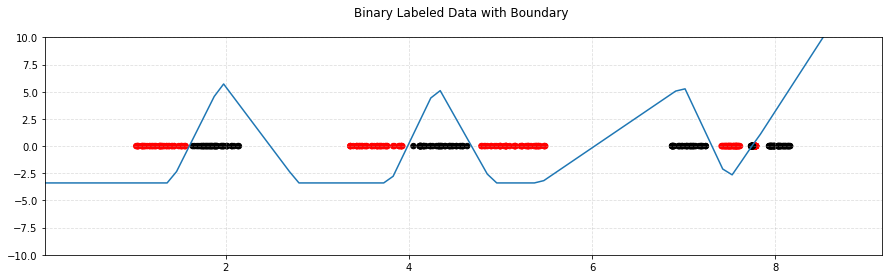

loss: 0.207 acc:  86% val_loss: 0.191 val_acc:  90%


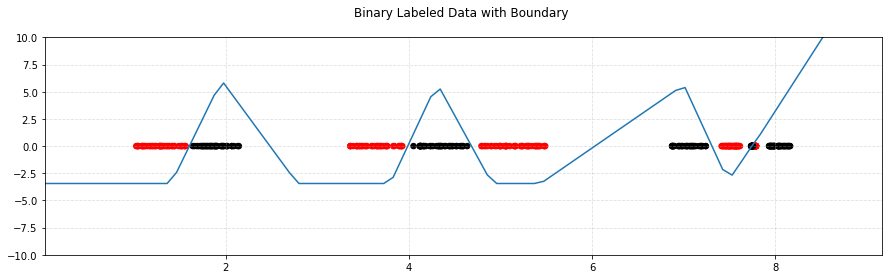

loss: 0.205 acc:  86% val_loss: 0.189 val_acc:  90%


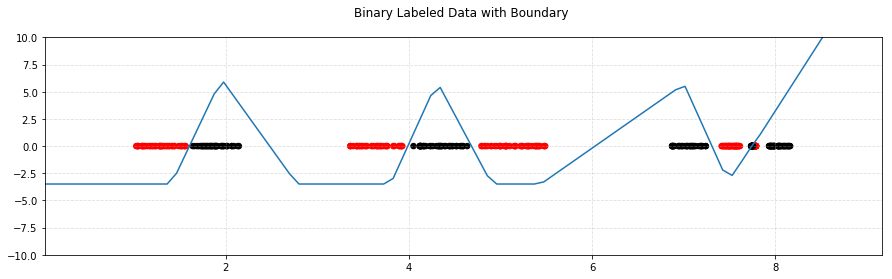

loss: 0.203 acc:  86% val_loss: 0.187 val_acc:  90%


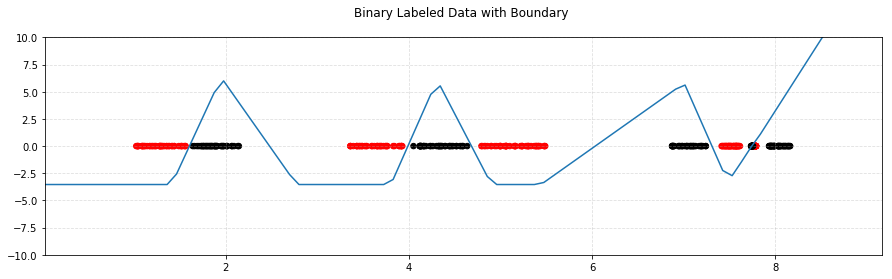

loss: 0.201 acc:  86% val_loss: 0.185 val_acc:  90%


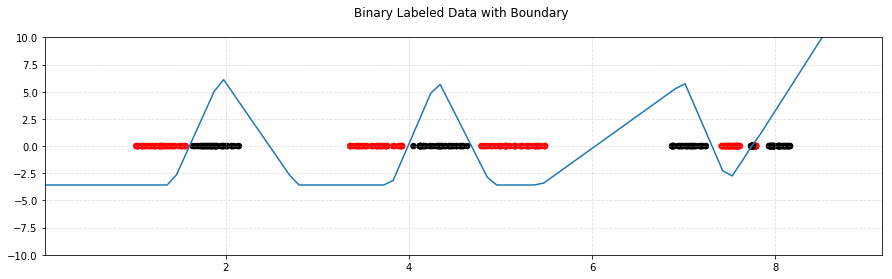

loss: 0.200 acc:  87% val_loss: 0.183 val_acc:  90%


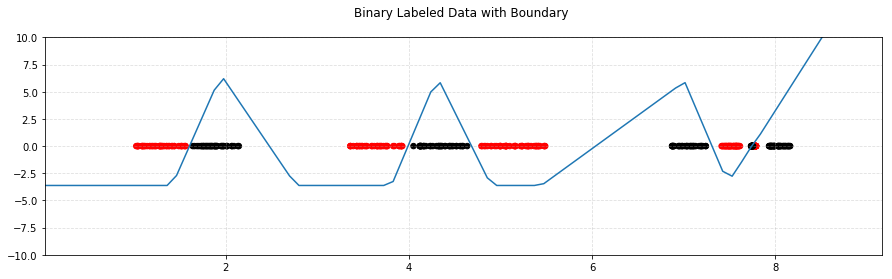

loss: 0.198 acc:  87% val_loss: 0.182 val_acc:  91%


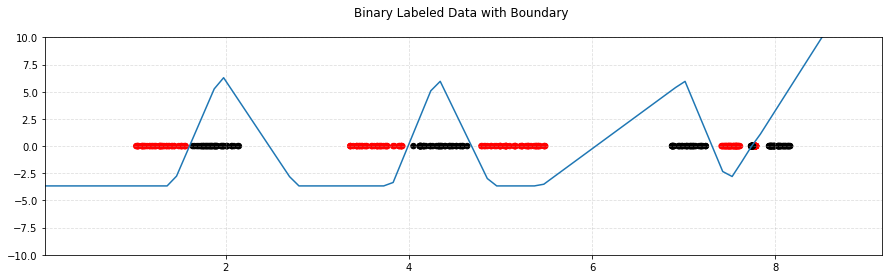

loss: 0.197 acc:  87% val_loss: 0.180 val_acc:  91%


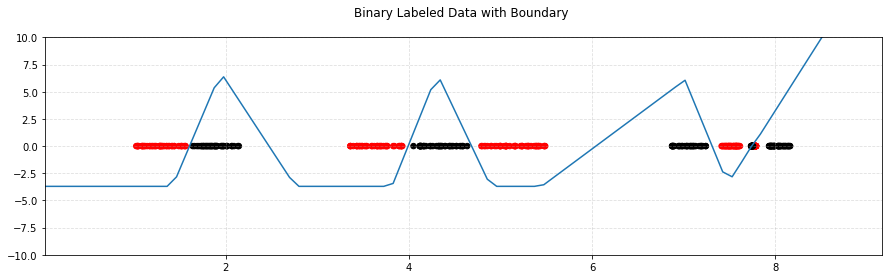

loss: 0.195 acc:  87% val_loss: 0.179 val_acc:  91%


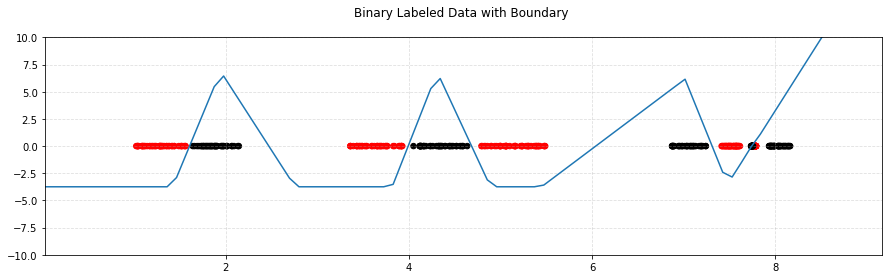

loss: 0.194 acc:  87% val_loss: 0.177 val_acc:  91%


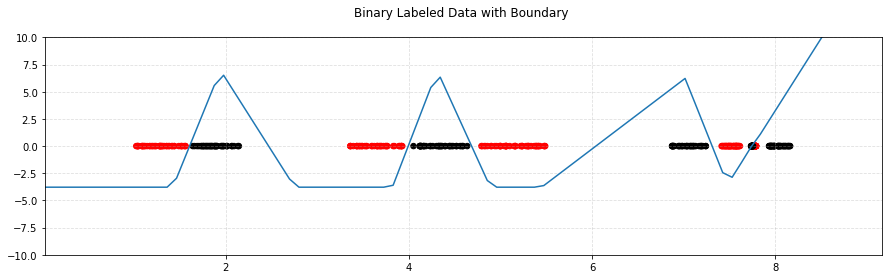

loss: 0.193 acc:  87% val_loss: 0.176 val_acc:  91%


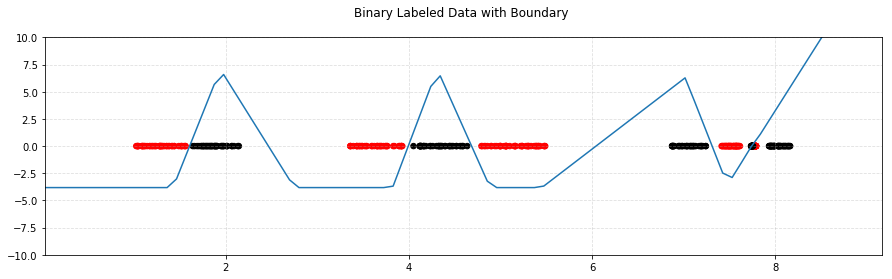

loss: 0.192 acc:  88% val_loss: 0.175 val_acc:  91%


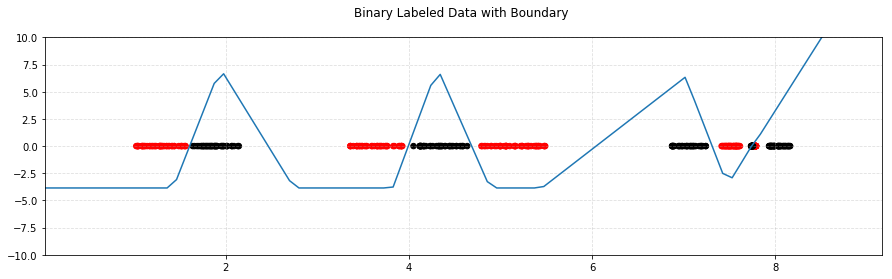

loss: 0.191 acc:  88% val_loss: 0.174 val_acc:  91%


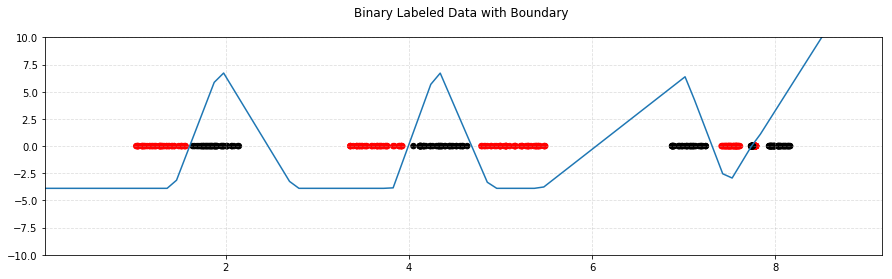

loss: 0.190 acc:  88% val_loss: 0.173 val_acc:  92%


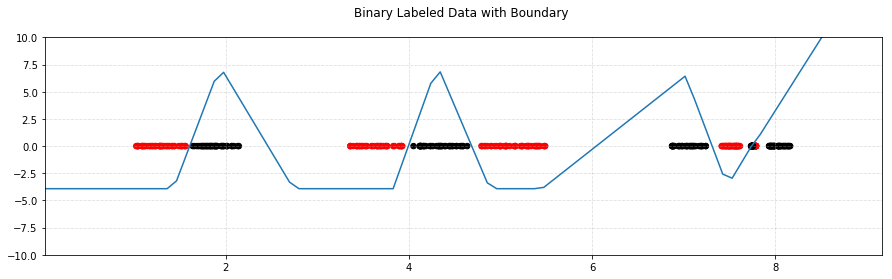

loss: 0.189 acc:  88% val_loss: 0.171 val_acc:  92%


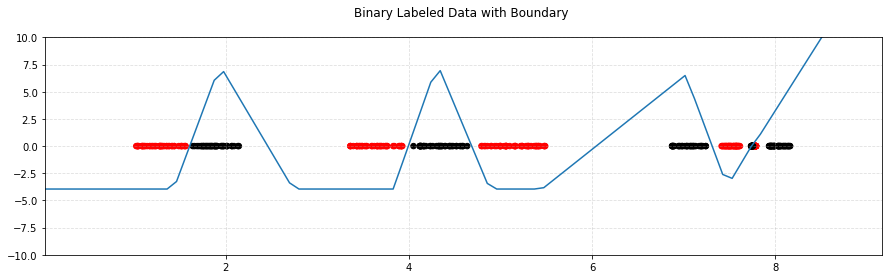

loss: 0.188 acc:  88% val_loss: 0.171 val_acc:  92%


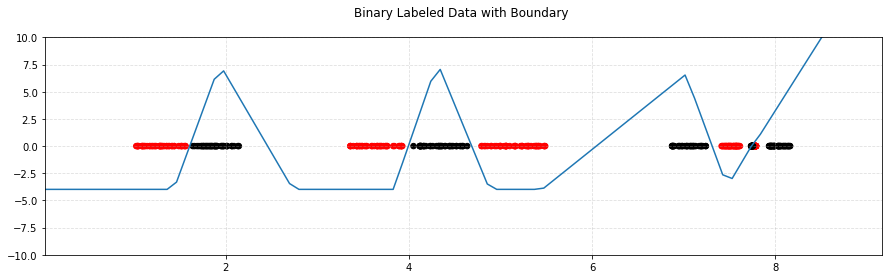

loss: 0.187 acc:  88% val_loss: 0.170 val_acc:  92%


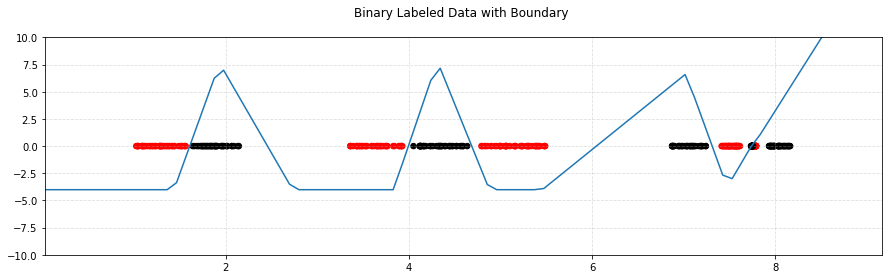

loss: 0.186 acc:  88% val_loss: 0.169 val_acc:  92%


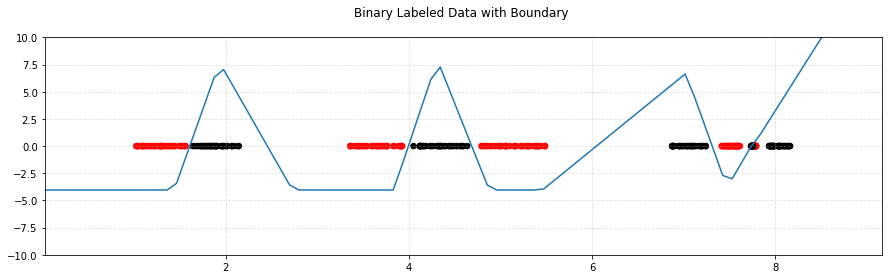

loss: 0.186 acc:  88% val_loss: 0.168 val_acc:  92%


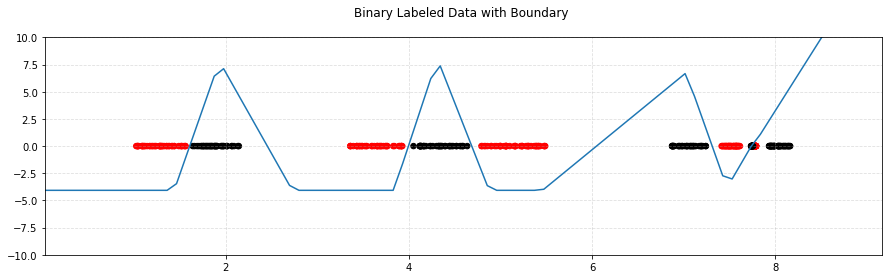

loss: 0.185 acc:  88% val_loss: 0.167 val_acc:  92%


KeyboardInterrupt: 

In [38]:
import matplotlib.pyplot as plt
import numpy as np
decision = mynetwork.decision
learning_rate = 0.001
for n in range(100):
    #mynetwork.train_mini_batch(X_train, Y_train, learning_rate=0.01, num_epochs=100, batch_size=X_train.shape[0], validation_data = (X_val,Y_val),verbose=False)
    mynetwork.train_mini_batch(X_train, Y_train, learning_rate=learning_rate, num_epochs=1000, batch_size=64, validation_data = (X_val,Y_val),verbose=False)
    plt.figure(figsize=(15,4))
    plt.scatter(X_train[:,0], np.zeros(X_train[:,0].shape), c=Y_train, cmap='flag', s = 30)
    plt.grid(alpha=.4,linestyle='--')
    X_line = np.arange(min(X_train[:,0])-1, max(X_train[:,0])+1, (max(X_train[:,0])-1 - min(X_train[:,0])-1)/50)
    X_line_reshape = X_line.reshape(X_line.shape[0],1)
    Y_line = [decision(X_line_reshape[i])[0][0] for i in range(len(X_line_reshape))]
    plt.plot(X_line, Y_line)
    plt.title('Binary Labeled Data with Boundary \n')
    plt.ylim(-10,10)
    plt.xlim(min(X_train[:,0])-1, max(X_train[:,0])+1)
    x = np.array(range(100))
    plt.show()
    plt.close()
    loss = mynetwork.binary_crossentropy_loss(X_train,Y_train)
    acc = mynetwork.accuracy(X_train,Y_train)
    val_loss = mynetwork.binary_crossentropy_loss(X_val,Y_val)
    val_acc = mynetwork.accuracy(X_val,Y_val)
    print(f"loss: {loss:.3f} acc: {acc: 0.0%} val_loss: {val_loss:.3f} val_acc: {val_acc: 0.0%}")